# Statistical analysis - experiment 2 

### Import the libraries 

In [1]:
import os
import numpy as np
import pandas as pd
from csv import reader
from statsmodels.stats.anova import AnovaRM
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 

### Function to collect all csv-files in the folder

In [2]:
def list_csv_files(resultsdir):
    csv_files = []

    if os.path.isdir(resultsdir):
        for root, dirs, files in list(os.walk(resultsdir)):
            for name in files:
                subdir = root.split(resultsdir)
                all('' == s for s in subdir)
                
                if subdir[1].startswith('/'):
                    subdirname = subdir[1][1:]
                else:
                    subdirname = subdir[1]

                if name.lower().endswith('.csv'):
                    if all('' == s for s in subdir):
                        csv_files.append(name)
                    else:
                        csv_files.append(os.path.join(subdirname, name))
    
        csv_files.sort()

    return csv_files

### Function to get all unique combinations

In [3]:
def get_unique_combinations(csv_files):
    unique_combinations = []
    for c in range(len(csv_files)):
        csv_file = csv_files[c]
        splits = csv_file.split("/")
        run_no = splits[0].split("run")[-1]
        sam_mt = splits[1].split("_")[0]
        unc_mt = splits[1].split("_")[1]
        prob = splits[1].split("_")[2]
        fwp = splits[1].split("_")[3]
        sam_sz = splits[1].split("_")[4]
        unique_combination = sam_mt + '_' + unc_mt + '_' + prob + '_' + fwp + '_' + sam_sz
        unique_combinations.append(unique_combination)
    return list(set(unique_combinations))

### Load the csv-files and store the data in a pandas-dataframe 

In [4]:
resultsdir = "results/exp2"
two_up = os.path.abspath(os.path.join(os.getcwd(),"../.."))
resultsdir = os.path.join(two_up, resultsdir)
csv_files = list_csv_files(resultsdir)

clmns = ["sampling_method", "uncertainty_method", "dropout_probability", "number_forward_passes", "sampling_size", "unique_combination", "run", "number_images", "mAP"]
df = pd.DataFrame(columns=clmns)
unique_combinations = get_unique_combinations(csv_files)

for c in range(len(csv_files)):
    csv_file = csv_files[c]
    splits = csv_file.split("/")
    run_no = splits[0].split("run")[-1]
    sam_mt = splits[1].split("_")[0]
    unc_mt = splits[1].split("_")[1]
    prob = splits[1].split("_")[2]
    fwp = splits[1].split("_")[3]
    sam_sz = splits[1].split("_")[4]
    unique_combination = sam_mt + '_' + unc_mt + '_' + prob + '_' + fwp + '_' + sam_sz
    uc_id = unique_combinations.index(unique_combination)

    with open(os.path.join(resultsdir, csv_file), 'r') as read_obj:
        csv_reader = reader(read_obj)
        next(csv_reader)
        for row in csv_reader:
            data = [sam_mt, unc_mt, float(prob), int(fwp), int(sam_sz), int(uc_id), int(run_no), int(row[0]), float(row[1])]
            df.loc[len(df)] = data

In [5]:
df

,sampling_method,uncertainty_method,dropout_probability,number_forward_passes,sampling_size,unique_combination,run,number_images,mAP
0,uncertainty,mean,0.25,20,200,2,1,100,19.5
1,uncertainty,mean,0.25,20,200,2,1,300,34.3
2,uncertainty,mean,0.25,20,200,2,1,500,41.4
3,uncertainty,mean,0.25,20,200,2,1,700,46.5
4,uncertainty,mean,0.25,20,200,2,1,900,45.4
...,...,...,...,...,...,...,...,...,...
775,uncertainty,min,0.75,40,200,3,5,1700,51.6
776,uncertainty,min,0.75,40,200,3,5,1900,54.3
777,uncertainty,min,0.75,40,200,3,5,2100,56.4
778,uncertainty,min,0.75,40,200,3,5,2300,56.4


### Plot the performance for each of the combinations

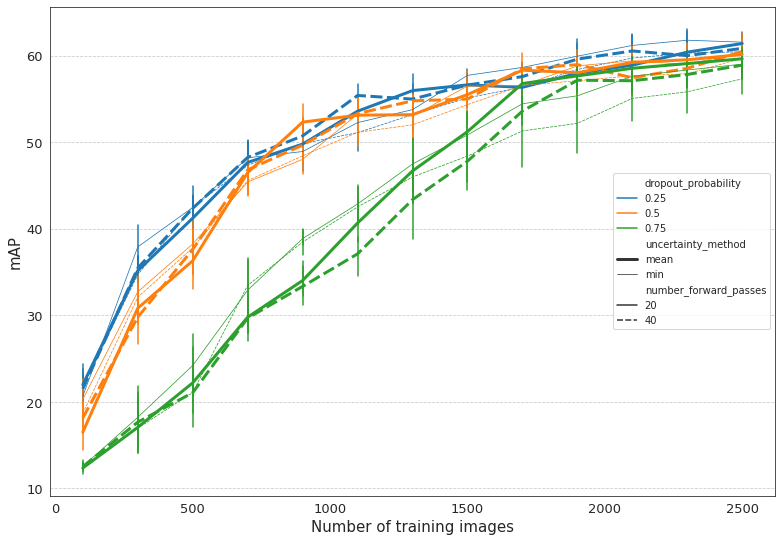

In [17]:
font_size = 15
digit_size = 13
annot_size = 14

sns.set_style("whitegrid")
sns.set_style("white")
f, ax = plt.subplots(figsize=(13, 9))
ax = sns.lineplot(x="number_images", y="mAP", style="number_forward_passes", size="uncertainty_method", hue="dropout_probability", err_style="bars", ci=95, data=df, palette = "tab10")
#ax = sns.lineplot(x="number_images", y="mAP", hue="number_forward_passes", style="dropout_probability", err_style="bars", ci=95, data=df, palette = "tab10")
ax.grid(which='major', axis='y', linestyle='--')
ax.tick_params(labelrotation=0, labelsize=digit_size)

plt.xlabel('Number of training images', fontsize=font_size)
plt.ylabel('mAP', fontsize=font_size)
plt.legend(loc='center right')
plt.show()

### ANOVA with repeated measures 

In [13]:
## one-way ANOVA on the unique_combination with repeated measures on the runs
# aovrm = AnovaRM(data=df, depvar='mAP', subject='run', within=['unique_combination'], aggregate_func='mean')

## two-way ANOVA on the unique_combination and the number_images with repeated measures on the runs
# aovrm = AnovaRM(data=df, depvar='mAP', subject='run', within=['unique_combination', 'number_images'])

## two-way ANOVA on the dropout_probability and the number_forward_passes with repeated measures on the runs
# mean = df.groupby(['dropout_probability', 'number_forward_passes']).mean()
# var = df.groupby(['dropout_probability', 'number_forward_passes']).var()
# aovrm = AnovaRM(data=df, depvar='mAP', subject='run', within=['dropout_probability', 'number_forward_passes'], aggregate_func='mean')

## three-way ANOVA on the dropout_probability and the number_forward_passes with repeated measures on the runs
mean = df.groupby(['dropout_probability', 'number_forward_passes', 'uncertainty_method']).mean()
var = df.groupby(['dropout_probability', 'number_forward_passes', 'uncertainty_method']).var()
# mean1 = df.groupby(['dropout_probability']).mean()
# mean2 = df.groupby(['number_forward_passes']).mean()
# mean3 = df.groupby(['uncertainty_method']).mean()
# var1 = df.groupby(['dropout_probability']).var()
# var2 = df.groupby(['number_forward_passes']).var()
# var3 = df.groupby(['uncertainty_method']).var()
aovrm = AnovaRM(data=df, depvar='mAP', subject='run', within=['dropout_probability', 'number_forward_passes', 'uncertainty_method'], aggregate_func='mean')

res = aovrm.fit()
print(mean)
print(var)
# print(mean1)
# print(mean2)
# print(mean3)
# print(var1)
# print(var2)
# print(var3)
print(res)

                                                                    mAP
dropout_probability number_forward_passes uncertainty_method           
0.25                20                    mean                50.535385
                                          min                 51.152308
                    40                    mean                51.063077
                                          min                 50.052308
0.50                20                    mean                49.187692
                                          min                 49.350769
                    40                    mean                49.150769
                                          min                 48.380000
0.75                20                    mean                41.975385
                                          min                 42.513846
                    40                    mean                40.546154
                                          min                 40

### Miscellaneous calculations - ANOVA table

In [7]:
# https://www.statsmodels.org/devel/examples/notebooks/generated/interactions_anova.html#Two-way-ANOVA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

nosum_lm = ols("mAP ~ C(dropout_probability) * C(number_forward_passes)", data=df).fit()
print(anova_lm(nosum_lm))

                                                    df        sum_sq  \
C(dropout_probability)                             2.0   2803.432094   
C(number_forward_passes)                           2.0     18.054530   
C(dropout_probability):C(number_forward_passes)    4.0     50.926752   
Residual                                         459.0  61816.988077   

                                                     mean_sq          F  \
C(dropout_probability)                           1401.716047  10.407943   
C(number_forward_passes)                            9.027265   0.067029   
C(dropout_probability):C(number_forward_passes)    12.731688   0.094535   
Residual                                          134.677534        NaN   

                                                   PR(>F)  
C(dropout_probability)                           0.000038  
C(number_forward_passes)                         0.935177  
C(dropout_probability):C(number_forward_passes)  0.984175  
Residual               

### Miscellaneous calculations - Least Significant Difference

In [8]:
# https://www.statology.org/fishers-least-significant-difference/
# https://personal.utdallas.edu/~herve/abdi-LSD2010-pretty.pdf
# https://stackoverflow.com/questions/19339305/python-function-to-get-the-t-statistic
# Studnt, n=999, p<0.05, 2-tail
den_df = 12
runs = 4
ms_res = 134.677534
t = stats.t.ppf(1-0.025, den_df)
LSD = t * np.sqrt(ms_res * (2/runs))
print(round(LSD,2))

17.88
